## Question: 
Calculate the relationship between stability within the health insurance system (use member months) and its relationship to chronic disease rate 

## Analysis: 
Logistic regression with binary coded chronic disease as the outcome of interest and independent variables that includes member months as one of the predictors controlling for demographic characteristics 

In [193]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [256]:
import pandas as pd
import numpy as np
import seaborn as sb
import scipy
from scipy.stats import spearmanr
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import warnings
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

In [190]:
med = pd.read_csv('../../data/reshaped_med.csv')

In [191]:
enroll = pd.read_csv('../../data/enroll.csv')

In [192]:
enroll.rename(columns={'Member ID Encrypted':'member_id'}, inplace=True)
enroll.rename(columns={'Incurred Year':'year'}, inplace=True)
enroll.rename(columns={'Total Medical Member Months':'month'}, inplace=True)
enroll.rename(columns={'Age':'age'}, inplace=True)
data = pd.merge(med, enroll, on=['member_id', 'year', 'age'], how='left')

In [171]:
#list(data)

In [164]:
a = data['month']

In [263]:
def regression(binary, claim):  
    plt.figure()
    check = sb.countplot(x=binary, data = data, palette = 'hls')
    plt.title('Check Counts')
    check
    
    data[claim].sum()
    print()
    plt.figure()
    reg = sb.regplot(x = 'month', y = binary, data = data, scatter = True)
    plt.title('Linear Logistic Regression Plot')
    reg
    b = data[claim]
    x = np.column_stack((a,b))
    x[np.isnan(x)] = 0
    y = data.ix[:, (8)].values

    LogReg = LogisticRegression()
    LogReg.fit(scale(x), y)
    print("accuracy of regression is:", LogReg.score(scale(x), y))
    print()
    
    y_pred = LogReg.predict(scale(x))
    print(classification_report(y, y_pred))
    print("note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) ")
    
    print(confusion_matrix(y, y_pred))
    print("correct: 15965 + 92, incorrect: 86 + 3736")
    logit_roc_auc = roc_auc_score(y, LogReg.predict(scale(x)))
    fpr, tpr, thresholds = roc_curve(y, LogReg.predict_proba(scale(x))[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).")
    return;

### Check correlation between asthma and month


accuracy of regression is: 0.8077368076865034

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     16051
           1       0.52      0.02      0.05      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.66      0.51      0.47     19879
weighted avg       0.75      0.81      0.73     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[15965    86]
 [ 3736    92]]
correct: 15965 + 92, incorrect: 86 + 3736


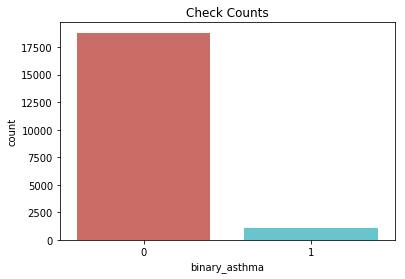

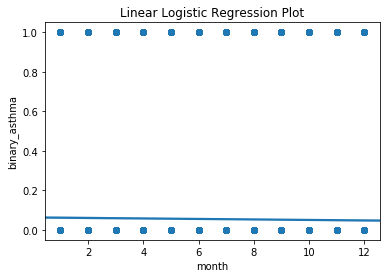

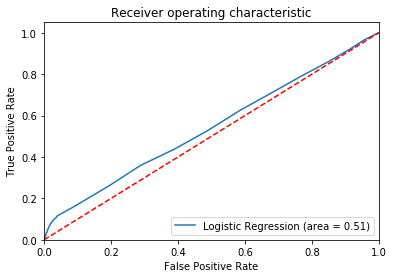

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [264]:
regression('binary_asthma', 'claims_asthma')

### Check correlation between bp and month


accuracy of regression is: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16051
           1       1.00      1.00      1.00      3828

   micro avg       1.00      1.00      1.00     19879
   macro avg       1.00      1.00      1.00     19879
weighted avg       1.00      1.00      1.00     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[16051     0]
 [    0  3828]]
correct: 15965 + 92, incorrect: 86 + 3736


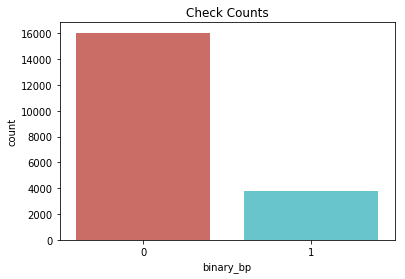

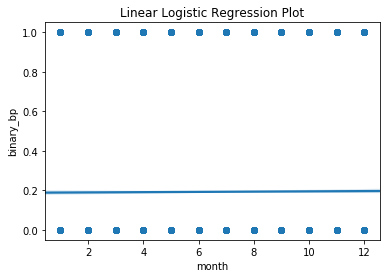

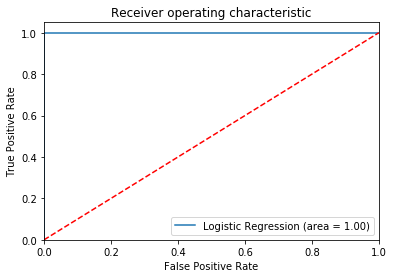

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [266]:
regression('binary_bp', 'claims_bp')

### Check correlation between cancer and month


accuracy of regression is: 0.8070828512500628

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     16051
           1       0.00      0.00      0.00      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.40      0.50      0.45     19879
weighted avg       0.65      0.81      0.72     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[16044     7]
 [ 3828     0]]
correct: 15965 + 92, incorrect: 86 + 3736


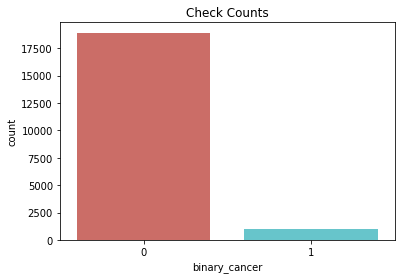

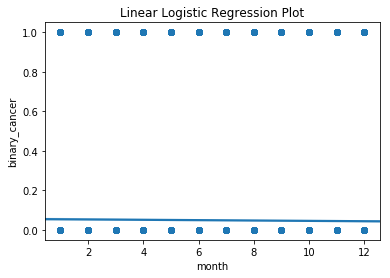

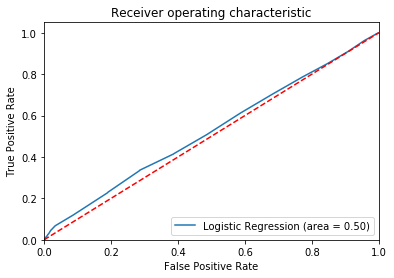

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [268]:
regression('binary_cancer', 'claims_cancer')

### Check correlation between cardiovascular and month


accuracy of regression is: 0.8100508073846773

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     16051
           1       0.59      0.05      0.08      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.70      0.52      0.49     19879
weighted avg       0.77      0.81      0.74     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[15930   121]
 [ 3655   173]]
correct: 15965 + 92, incorrect: 86 + 3736


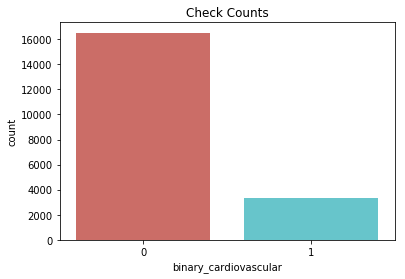

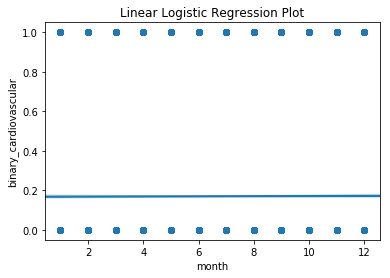

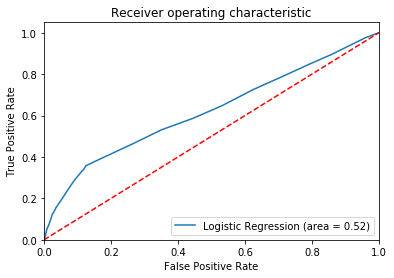

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [269]:
regression('binary_cardiovascular', 'claims_cardiovascular')

### Check correlation between cholesterol and month


accuracy of regression is: 0.8199104582725489

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     16051
           1       0.63      0.15      0.25      3828

   micro avg       0.82      0.82      0.82     19879
   macro avg       0.73      0.57      0.57     19879
weighted avg       0.79      0.82      0.77     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[15715   336]
 [ 3244   584]]
correct: 15965 + 92, incorrect: 86 + 3736


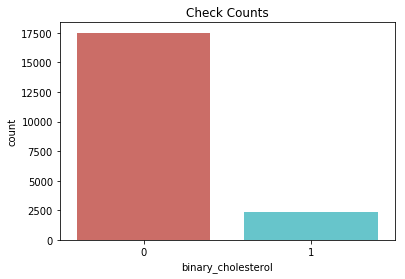

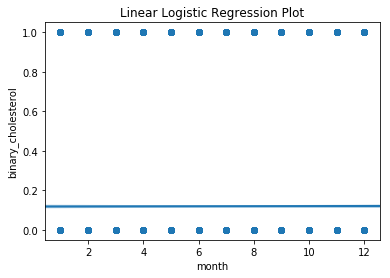

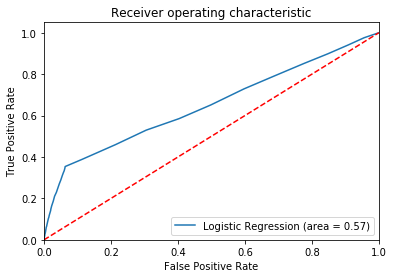

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [270]:
regression('binary_cholesterol', 'claims_cholesterol')

### Check correlation between copd and month


accuracy of regression is: 0.8080386337340912

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     16051
           1       0.56      0.01      0.03      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.69      0.51      0.46     19879
weighted avg       0.76      0.81      0.73     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[16010    41]
 [ 3775    53]]
correct: 15965 + 92, incorrect: 86 + 3736


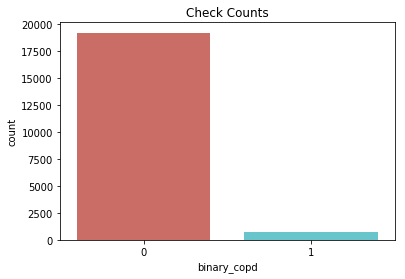

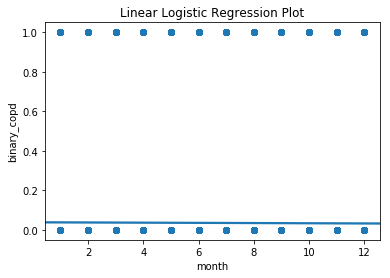

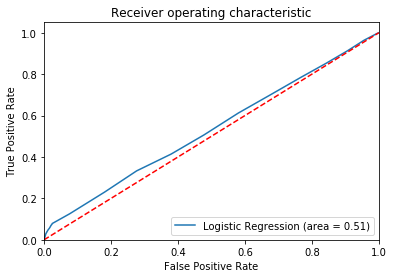

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [271]:
regression('binary_copd', 'claims_copd')

### Check correlation between diabetes and month


accuracy of regression is: 0.8160873283364354

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16051
           1       0.66      0.09      0.16      3828

   micro avg       0.82      0.82      0.82     19879
   macro avg       0.74      0.54      0.53     19879
weighted avg       0.79      0.82      0.76     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[15863   188]
 [ 3468   360]]
correct: 15965 + 92, incorrect: 86 + 3736


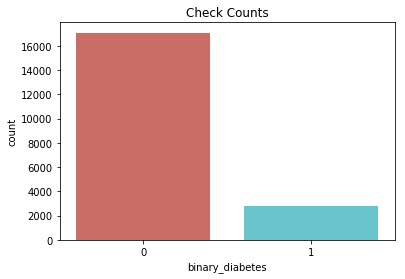

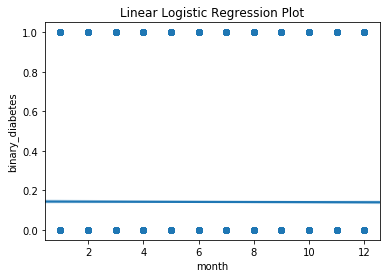

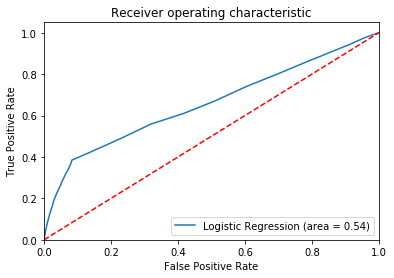

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [272]:
regression('binary_diabetes', 'claims_diabetes')

### Check correlation between kidney and month


accuracy of regression is: 0.8073343729563861

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     16051
           1       0.38      0.00      0.00      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.59      0.50      0.45     19879
weighted avg       0.72      0.81      0.72     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[16046     5]
 [ 3825     3]]
correct: 15965 + 92, incorrect: 86 + 3736


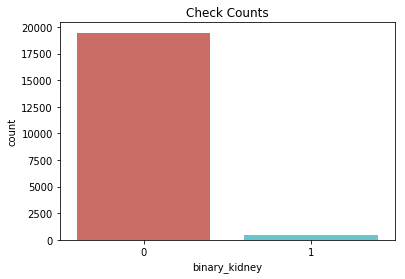

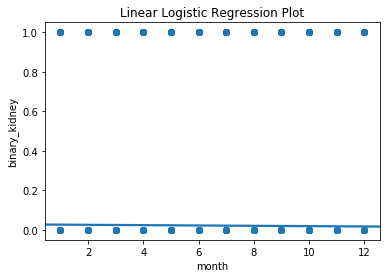

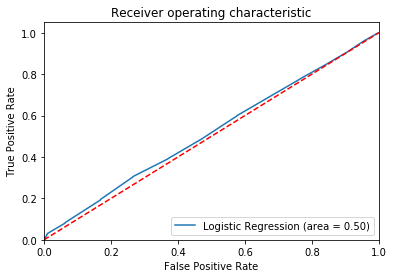

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [273]:
regression('binary_kidney', 'claims_kidney')

### Check correlation between mental_disorder and month


accuracy of regression is: 0.8076361990039741

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     16051
           1       0.59      0.00      0.01      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.70      0.50      0.45     19879
weighted avg       0.77      0.81      0.72     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[16042     9]
 [ 3815    13]]
correct: 15965 + 92, incorrect: 86 + 3736


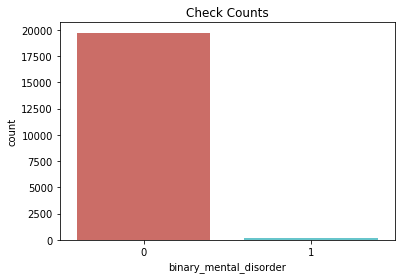

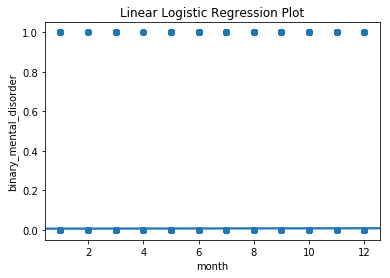

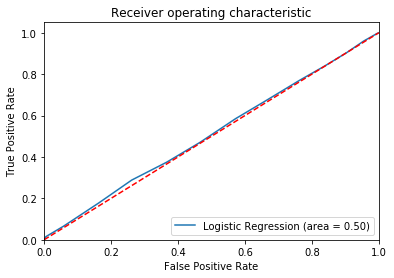

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [274]:
regression('binary_mental_disorder', 'claims_mental_disorder')

### Check correlation between musculoskeletal and month


accuracy of regression is: 0.8073846772976507

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     16051
           1       0.43      0.00      0.00      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.62      0.50      0.45     19879
weighted avg       0.73      0.81      0.72     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[16047     4]
 [ 3825     3]]
correct: 15965 + 92, incorrect: 86 + 3736


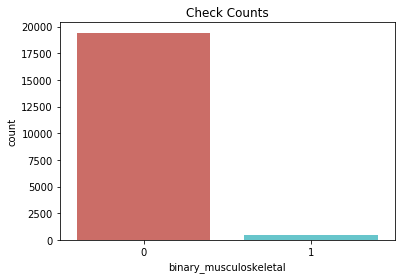

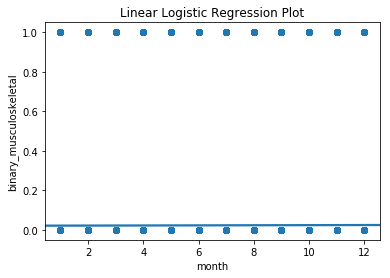

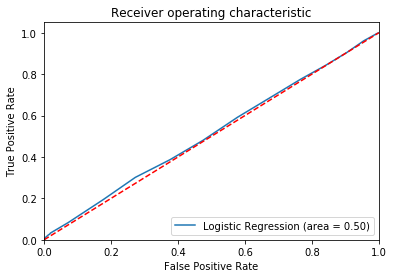

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [275]:
regression('binary_musculoskeletal', 'claims_musculoskeletal')

### Check correlation between obesity and month


accuracy of regression is: 0.8095477639720308

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     16051
           1       0.58      0.04      0.08      3828

   micro avg       0.81      0.81      0.81     19879
   macro avg       0.69      0.52      0.49     19879
weighted avg       0.77      0.81      0.74     19879

note: The reported averages include macro average (averaging the unweighted mean per label), micro average (averaging the total true positives, false negatives and false positives) and weighted average (averaging the support-weighted mean per label) 
[[15935   116]
 [ 3670   158]]
correct: 15965 + 92, incorrect: 86 + 3736


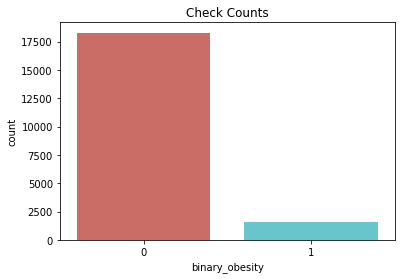

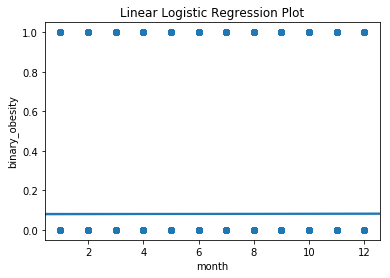

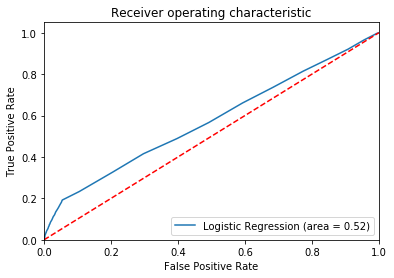

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


In [276]:
regression('binary_obesity', 'claims_obesity')